## DENSITY-BASED CLUSTERING

In [21]:
!pip install basemap==1.2.0 matplotlib==3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 34.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [22]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Data Generation

Create random data and store in feature matrix X and response vector y. Standardize features by removing the mean and scaling to unit variance

In [23]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
   
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    X = StandardScaler().fit_transform(X)
    return X, y

 Using createDataPoints with the 3 inputs and store the output into variables X and y.

In [24]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### Modelling with Epsilon and minimumSamples

In [25]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 1, ..., 1, 1, 1])

### Distinguishing outliers

Creating an array of booleans using the labels from db.

In [26]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

Number of clusters in labels, ignoring noise if present.

In [27]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

Removing repetition in labels by turning it into a set.

In [28]:
unique_labels = set(labels)
unique_labels

{0, 1, 2}

### Data visualization

Creating colors for the clusters.

In [29]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

Ploting the datapoints and the outliers with colors

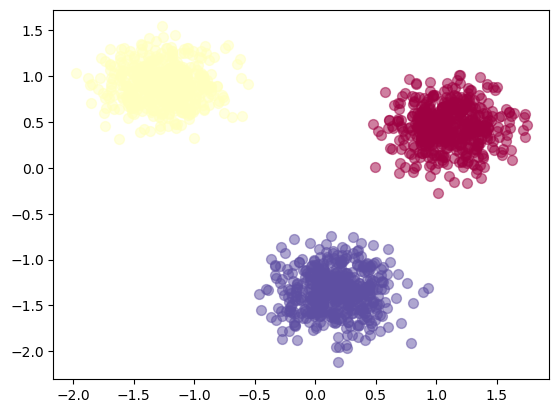

In [30]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)